# Latent inverse Go-Explore

In [1]:
import gym
import panda_gym
from stable_baselines3 import DDPG
from lge import LatentGoExplore


env = gym.make("PandaNoTask-v0", nb_objects=1, render=True)
n = 500_000
lge = LatentGoExplore(
    DDPG,
    env,
    module_type="forward",
    latent_size=8,
    distance_threshold=1.0,
    lighten_dist_coef=0.0,
    p=0.001,
    model_kwargs=dict(buffer_size=n),
    verbose=1,
)

pybullet build time: May 20 2022 19:44:17


argv[0]=--background_color_red=0.8745098039215686
argv[1]=
argv[2]=
argv[3]=
argv[4]=
argv[5]=
argv[6]=
argv[7]=
argv[8]=
argv[9]=
argv[10]=
argv[11]=
argv[12]=
argv[13]=
argv[14]=
argv[15]=
argv[16]=
argv[17]=
argv[18]=
argv[19]=
argv[20]=
argv[21]=--background_color_green=0.21176470588235294
argv[22]=
argv[23]=
argv[24]=
argv[25]=
argv[26]=
argv[27]=
argv[28]=
argv[29]=
argv[30]=
argv[31]=
argv[32]=
argv[33]=
argv[34]=
argv[35]=
argv[36]=
argv[37]=
argv[38]=
argv[39]=
argv[40]=
argv[41]=
argv[42]=--background_color_blue=0.17647058823529413
startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=45
argv[0] = --unused
argv[1] = --background_color_red=0.8745098039215686
argv[2] = 
argv[3] = 
argv[4] = 
argv[5] = 
argv[6] = 
argv[7] = 
argv[8] = 
argv[9] = 
argv[10] = 
argv[11] = 
argv[12] = 
argv[13] = 
argv[14] = 
argv[15] = 
argv[16] = 
argv[17] = 
argv[18] = 
argv[19] = 
argv[20] = 
argv[21] = 
argv[22] = --background_color_green=0.21176470588235294
argv[23] = 
argv

{'distance_threshold': 1.0,
 'p': 0.005,
 'latent_size': 8,
 'lighten_dist_coef': 0}

In [2]:
lge.explore(n)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -37.5    |
|    success_rate    | 0.25     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 461      |
|    time_elapsed    | 0        |
|    total_timesteps | 200      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -43.8    |
|    success_rate    | 0.125    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 469      |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -41.7    |
|    success_rate    | 0.167    |
| time/              |          |
|    episodes        | 12       |
|    fps      

In [3]:
env.close()

Compute coverage

In [4]:
from toolbox.panda_utils import compute_coverage

archive = lge.archive
pos = archive.pos if not archive.full else archive.buffer_size
observations = archive.next_observations["observation"][:pos]
counts = compute_coverage(observations)

Plot coverage

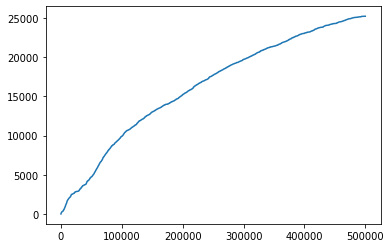

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1)
axs.plot(counts)

In [7]:
import numpy as np

archive.recompute_embeddings()
embeddings = archive.next_embeddings[:pos].reshape(pos, -1)
sorted_density = archive.sorted_density[:pos]
_, index = np.unique(sorted_density, return_index=True)
p = archive.p
prob = (1 - p) ** (np.arange(n) - 1) * p
prob = prob[index]
density = archive.density[:pos]

Plot the embedding.

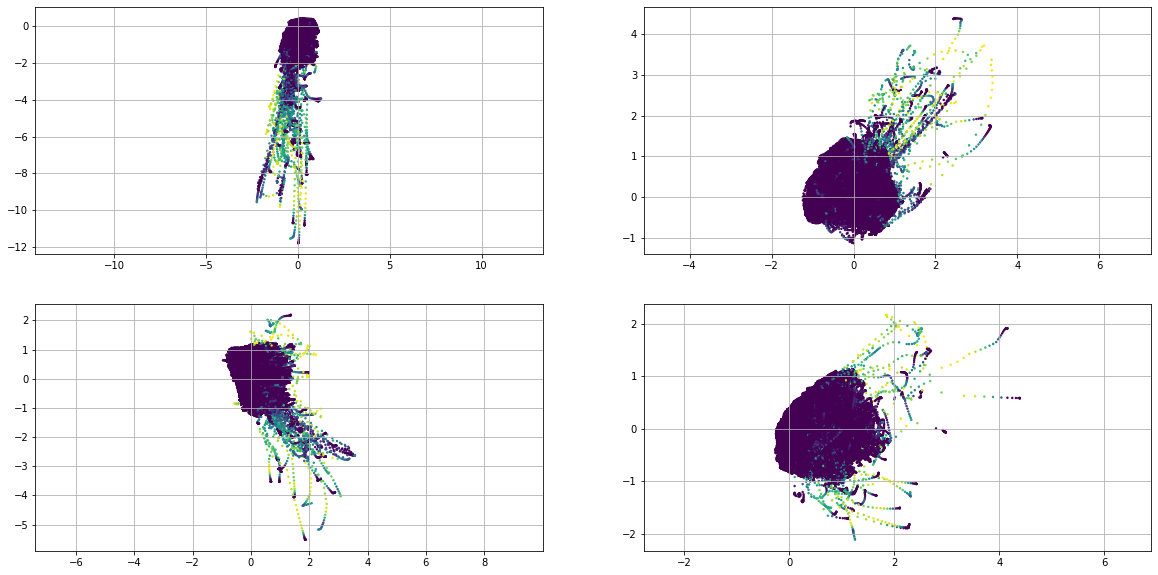

In [8]:
cmap = plt.get_cmap()
color = cmap(prob / prob.max())

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)

# Quantized latent
for i, j in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axs[i, j].grid()
    axs[i, j].axis("equal")
    k = 2 * i + j
    axs[i, j].scatter(*embeddings[:, 2 * k : 2 * k + 2].T, c=color, s=2)

Plot the observation.

Observation space:

| Index | Meaning |
|-|-|
| 0 | Gripper position x |
| 1 | Gripper position y |
| 2 | Gripper position z |
| 3 | Gripper width |
| 4 | Object position x |
| 5 | Object position y |
| 6 | Object position z |


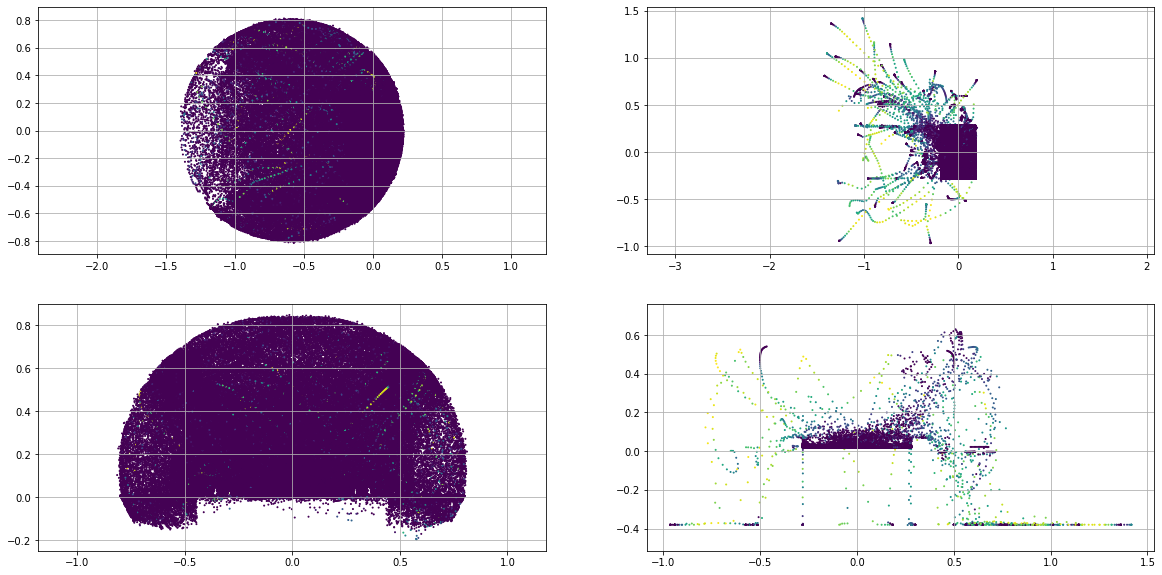

In [9]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(20)

observations = observations.reshape(pos, -1)

axs[0, 0].grid()
axs[0, 0].axis("equal")
axs[0, 0].scatter(*observations[:, [0, 1]].T, c=color, s=1)

axs[1, 0].grid()
axs[1, 0].axis("equal")
axs[1, 0].scatter(*observations[:, [1, 2]].T, c=color, s=1)


axs[0, 1].grid()
axs[0, 1].axis("equal")
axs[0, 1].scatter(*observations[:, [4, 5]].T, c=color, s=1)

axs[1, 1].grid()
axs[1, 1].axis("equal")
axs[1, 1].scatter(*observations[:, [5, 6]].T, c=color, s=1)

In [10]:
traj, _ = archive.sample_trajectory()
traj = traj.round(1)

print("gripper trajectory")
print(traj[..., 0:3])
print("object trajetcory")
print(traj[..., 4:7])

gripper trajectory
[[ 0.   0.   0. ]
 [-0.2 -0.   0.1]
 [-0.3  0.2  0.2]
 [-0.8  0.5  0.6]]
object trajetcory
[[-0.  -0.   0. ]
 [-0.2 -0.1  0. ]
 [-0.2  0.1  0.1]
 [-0.2  0.2  0.1]]
